<a href="https://colab.research.google.com/github/Nore-gibhub/Challenge_Alura_Store/blob/main/Challenge_Alura_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Análisis de facturación1.**

##**Carga de datos**

In [88]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


##**Ingreso Total por cada tienda**

####En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

###Pasos
####1.   Combinar tablas
####2.   Agrupar y sumar


In [89]:
tienda['tiendat']='tienda'
tienda2['tiendat']='tienda2'
tienda3['tiendat']='tienda3'
tienda4['tiendat']='tienda4'

df_total = pd.concat([tienda,tienda2,tienda3,tienda4])
df_total.sample(5)


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tiendat
1642,Bicicleta,Deportes y diversión,363100.0,17500.0,08/07/2022,Izabela de León,Cali,5,Nequi,1,3.43722,-76.52250,tienda2
1689,Auriculares con micrófono,Electrónicos,241600.0,13600.0,17/08/2022,Camila Rivera,Medellín,1,Tarjeta de crédito,8,6.25184,-75.56359,tienda3
1297,Asistente virtual,Electrónicos,265100.0,14500.0,20/04/2021,Izabela de León,Bogotá,5,Cupón,1,4.60971,-74.08175,tienda2
333,Tablet ABXY,Electrónicos,1736100.0,92800.0,02/02/2022,Rafael Acosta,Santa Marta,5,Tarjeta de crédito,6,11.24079,-74.19904,tienda4
1131,Microondas,Electrodomésticos,498400.0,24700.0,09/09/2020,Camila Rivera,Manizales,1,Tarjeta de crédito,5,5.06889,-75.51738,tienda3


In [90]:
ingreso_por_tienda = df_total.groupby('tiendat')['Precio'].sum()
print(ingreso_por_tienda)

tiendat
tienda     1.150880e+09
tienda2    1.116344e+09
tienda3    1.098020e+09
tienda4    1.038376e+09
Name: Precio, dtype: float64


##**Ventas por categoría**

####En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

###Paso


1.   Agrupar y contar



In [91]:
#Cantidad de productos vendidos por cada categoría
ventas_por_tienda_cat = df_total.groupby(['tiendat', 'Categoría del Producto']).size().reset_index(name='Cantidad_Vendida')
ventas_ordenadas = ventas_por_tienda_cat.sort_values(by=['tiendat','Cantidad_Vendida'], ascending=[True,False])
print('Cantidad de productos vendidos por categoría en cada tienda')
print(ventas_ordenadas)
print(' ')
#Categorías mas polulares de cada tienda
idx_max = ventas_ordenadas.groupby('tiendat')['Cantidad_Vendida'].idxmax()
Cat_mas_vendidos_por_tienda = ventas_ordenadas.loc[idx_max]
print('Categorías más populares de cada tienda')
print(Cat_mas_vendidos_por_tienda)


Cantidad de productos vendidos por categoría en cada tienda
    tiendat   Categoría del Producto  Cantidad_Vendida
7    tienda                  Muebles               465
3    tienda             Electrónicos               448
5    tienda                 Juguetes               324
2    tienda        Electrodomésticos               312
1    tienda     Deportes y diversión               284
4    tienda   Instrumentos musicales               182
6    tienda                   Libros               173
0    tienda  Artículos para el hogar               171
15  tienda2                  Muebles               442
11  tienda2             Electrónicos               422
13  tienda2                 Juguetes               313
10  tienda2        Electrodomésticos               305
9   tienda2     Deportes y diversión               275
12  tienda2   Instrumentos musicales               224
14  tienda2                   Libros               197
8   tienda2  Artículos para el hogar               181
23  t

##**Valoración media por tienda**

####En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.



In [92]:
Calificacion_prom_por_tienda = df_total.groupby('tiendat')['Calificación'].mean()
print(Calificacion_prom_por_tienda)

tiendat
tienda     3.976685
tienda2    4.037304
tienda3    4.048326
tienda4    3.995759
Name: Calificación, dtype: float64


##**Productos más vendidos y menos vendidos**

####En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [93]:
ventas_por_tienda_producto = df_total.groupby(['tiendat', 'Producto']).size().reset_index(name='Cantidad_Vendida')

# Encuentra el producto más vendido para cada tienda
idx_max = ventas_por_tienda_producto.groupby('tiendat')['Cantidad_Vendida'].idxmax()
productos_mas_vendidos_por_tienda = ventas_por_tienda_producto.loc[idx_max]
print("Productos más vendidos por tienda:")
print(productos_mas_vendidos_por_tienda)
print(' ')

# Encuentra el producto menos vendido para cada tienda
idx_min = ventas_por_tienda_producto.groupby('tiendat')['Cantidad_Vendida'].idxmin()
productos_menos_vendidos_por_tienda = ventas_por_tienda_producto.loc[idx_min]
print("Productos menos vendidos por tienda:")
print(productos_menos_vendidos_por_tienda)

Productos más vendidos por tienda:
     tiendat                   Producto  Cantidad_Vendida
1     tienda                    Armario                60
75   tienda2  Iniciando en programación                65
129  tienda3              Kit de bancas                57
163  tienda4                   Cama box                62
 
Productos menos vendidos por tienda:
     tiendat                   Producto  Cantidad_Vendida
4     tienda  Auriculares con micrófono                33
77   tienda2              Juego de mesa                32
111  tienda3    Bloques de construcción                35
175  tienda4         Guitarra eléctrica                33


##**Valor del envío promedio por tienda**

####En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [94]:
Cost_prom_de_envio = df_total.groupby('tiendat')['Costo de envío'].mean()
print(Cost_prom_de_envio)

tiendat
tienda     26018.609580
tienda2    25216.235693
tienda3    24805.680373
tienda4    23459.457167
Name: Costo de envío, dtype: float64


#**2. ANÁLISIS CON GRÁFICOS**

##**Ventas por cada tienda**

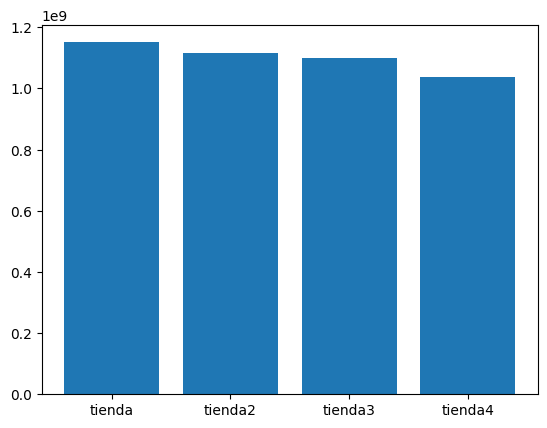

In [95]:
from matplotlib import pyplot as plt
plt.bar(x=ingreso_por_tienda.index, height=ingreso_por_tienda.values)
plt.show()

##**Valoración media por tienda**


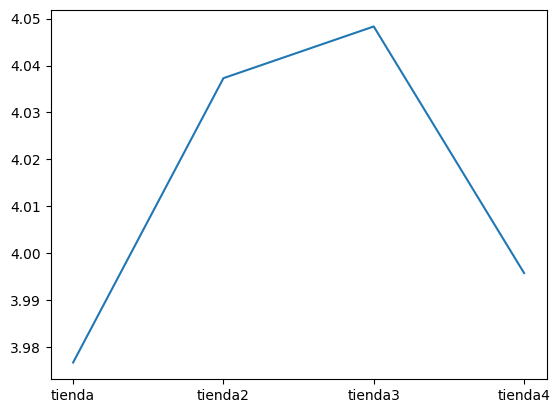

In [96]:
from matplotlib import pyplot as plt
x = Calificacion_prom_por_tienda.index
y = Calificacion_prom_por_tienda.values
plt.plot(x,y)
plt.show()


##**Última Fecha de compra por tienda**

tiendat
tienda    2023-03-31
tienda2   2023-03-31
tienda3   2023-03-31
tienda4   2023-03-30
Name: Fecha de Compra, dtype: datetime64[ns]
 


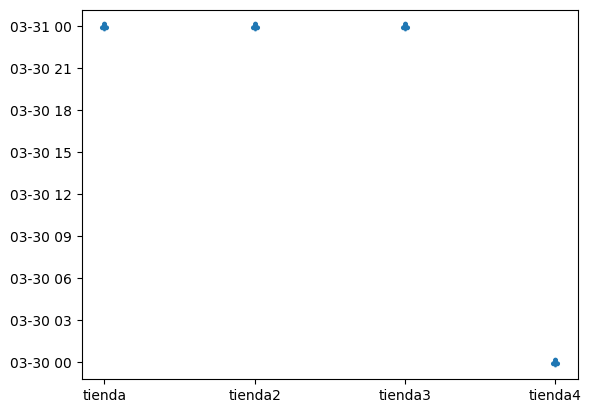

In [98]:
df_total['Fecha de Compra'] = pd.to_datetime(df_total['Fecha de Compra'])
ultima_venta_por_tienda = df_total.groupby('tiendat')['Fecha de Compra'].max()
print(ultima_venta_por_tienda)
print(' ')
#df_ordenado = df_total.sort_values(by='Fecha de Compra',ascending=False)
#tiendas_ordenadas_unicas = df_ordenado['tiendat'].unique()
#print(df_ordenado[['tiendat','Fecha de Compra','Producto']].head())

from matplotlib import pyplot as plt
x = ultima_venta_por_tienda.index
y = ultima_venta_por_tienda.values
fig, ax = plt.subplots()
ax.scatter(x, y, marker = r'$\clubsuit$')
plt.show()